# Visualization for Sakila Movie Database

This notebook is used for generating visualizations based on the PostgreSQL data analysis results.

Several interesting questions have been explored as we can see below.

**Table of Contents**

- [Query 1. What is the rental behavior in family movies?](#query1)

- [Query 2. What were the rental duration in quartile for family movies?](#query2)

- [Query 3. What were the rental orders by store?](#query4)

- [Query 4. Payment Difference between months for Top 10 Payors](#query6)




In [1]:
# change to working directory
import os
os.chdir('projects_on_GitHub/udacity_project/SQL/Sakila_Query_Viz')

In [2]:
ls

README.md
Visualization_for_Sakila_QueryResult.ipynb
query.sql
query1.csv
query1_rental_count_byCat.png
query2.csv
query3.csv
query4.csv
query5.csv
query6.csv


In [3]:
# Configure some basic parameters of plotting for general purpose (uniformity)
figsize=(8, 4)
dpi = 100
label_fontsize = 12
title_fontsize = 18
title_pad = 15
label_pad = 6

<a id='query1'></a>
## Query 1. What is the rental behavior in family movies?

We want to understand more about the movies that families are watching. The following categories are considered family movies: **Animation, Children, Classics, Comedy, Family and Music**. Create a query that lists each movie, the film category it is classified in, and the number of times it has been rented out.

In [36]:
# Explore the dataset
df1 = pd.read_csv('query_results/query1.csv')
df1.head()

,film_title,category_name,rental_count
0,Alter Victory,Animation,22
1,Anaconda Confessions,Animation,21
2,Bikini Borrowers,Animation,17
3,Blackout Private,Animation,27
4,Borrowers Bedazzled,Animation,22


In [5]:
# SQL already filtered out the defined 'family movies' for us. Verify as follows.
df1.category_name.unique()

array(['Animation', 'Children', 'Classics', 'Comedy', 'Family', 'Music'],
      dtype=object)

In [6]:
# construct dataframe for plot bar graph
df1 = df1.groupby('category_name').rental_count.sum().sort_values(ascending=False).to_frame().reset_index()
df1

,category_name,rental_count
0,Animation,1166
1,Family,1096
2,Children,945
3,Comedy,941
4,Classics,939
5,Music,830


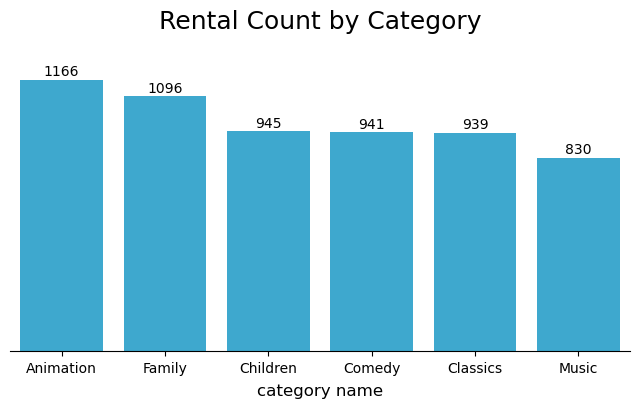

In [7]:
# Figure size and dpi settings
fig = plt.figure(figsize=figsize, dpi=dpi)

# Main function for bar plotting
sns.barplot(data=df1, x='category_name', y='rental_count', color='#26B3E6')

# Customize plotting for presentation
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_facecolor('white')
fig.set_facecolor('white');

# Map the results on top of respective bars
for i in range (df1.shape[0]):
    plt.text(i, df1.loc[i, 'rental_count']+20, df1.loc[i, 'rental_count'], ha='center')

# Setting for labels and title
plt.title('Rental Count by Category', fontsize=title_fontsize, pad=title_pad)
plt.xlabel('category name', fontsize=label_fontsize, labelpad=label_pad)
plt.ylabel('# of rentals', fontsize=label_fontsize, labelpad=label_pad)
plt.ylim(0, 1300)
plt.xticks(fontsize=10);
ax.axes.yaxis.set_visible(False);

# Export the viz
plt.savefig('viz/query1_rental_count_byCat.png', dpi=120, transparent=True)

<a id='query2'></a>
## Query 2. What were the rental duration in quartile for family movies?

Now we need to know how the length of rental duration of these family-friendly movies compares to the duration that all movies are rented for. Can you provide a table with the movie titles and divide them into 4 levels (first_quarter, second_quarter, third_quarter, and final_quarter) based on the quartiles (25%, 50%, 75%) of the rental duration for movies across all categories? Make sure to also indicate the category that these family-friendly movies fall into.

In [8]:
# Load in the dataset
df2 = pd.read_csv('query_results/query2.csv')
df2

,film_title,category_name,rental_duration,quartile_level
0,Sweethearts Suspects,Children,3,1
1,Go Purple,Music,3,1
2,Bilko Anonymous,Family,3,1
3,Wait Cider,Animation,3,1
4,Daughter Madigan,Children,3,1
...,...,...,...,...
356,Wasteland Divine,Classics,7,4
357,Rebel Airport,Music,7,4
358,Pond Seattle,Animation,7,4
359,Perfect Groove,Comedy,7,4


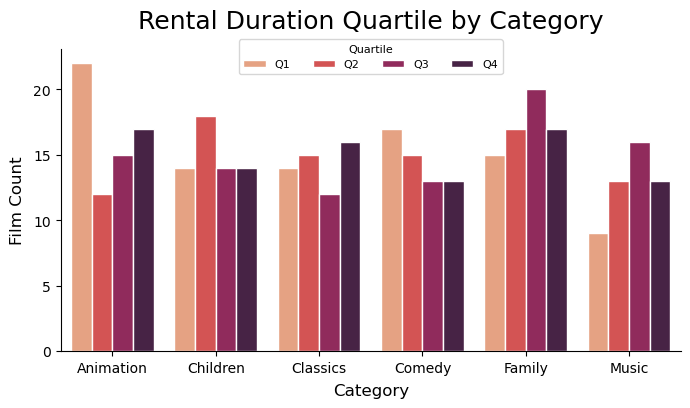

In [10]:
# sort values by category name alphabetically for plotting purpose
df2 = df2.sort_values(by='category_name')

# setting for figure size and resolution
fig = plt.figure(figsize=figsize, dpi=dpi)

# main function for plotting
sns.countplot(data=df2, x='category_name', hue='quartile_level', palette='rocket_r', edgecolor='white')

# customized settings for presentation
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('white')
fig.set_facecolor('white');

# customize legend display
plt.legend(['Q1', 'Q2', 'Q3', 'Q4'], 
           ncol=4, 
           title='Quartile', 
           title_fontsize=8,  
           prop={'size':8}, 
           loc='upper center', 
           fancybox=True, 
           bbox_to_anchor=[.5, 1.05])

# setting for title and axis labels
plt.title(label='Rental Duration Quartile by Category', pad=title_pad, fontsize=title_fontsize)
plt.xlabel('Category', labelpad=label_pad, fontsize=label_fontsize)
plt.ylabel('Film Count', labelpad=label_pad, fontsize=label_fontsize);

# Export viz to file
plt.savefig('query2_rental_duration_quartile.png', dpi=120, transparent=True)

<a id='query4'></a>
## Query 3. What were the rental orders by store?

Finally, provide a table with the family-friendly film category, each of the quartiles, and the corresponding count of movies within each combination of film category for each corresponding rental duration category. The resulting table should have three columns:

- Category
- Rental length category
- Count

In [12]:
# Load in dataset
df3 = pd.read_csv('query_results/query4.csv')
df3

,rental_month,rental_year,store_id,count_rentals
0,7,2005,2,3367
1,7,2005,1,3342
2,8,2005,1,2892
3,8,2005,2,2794
4,6,2005,1,1163
5,6,2005,2,1148
6,5,2005,2,598
7,5,2005,1,558
8,2,2006,2,97
9,2,2006,1,85


In [13]:
# data wrangling for visualization
df3['rental_year_month'] = df3['rental_year'].astype(str) + '-0' + df3['rental_month'].astype(str)
df3 = df3.sort_values(by='rental_year_month')
df3

,rental_month,rental_year,store_id,count_rentals,rental_year_month
6,5,2005,2,598,2005-05
7,5,2005,1,558,2005-05
4,6,2005,1,1163,2005-06
5,6,2005,2,1148,2005-06
0,7,2005,2,3367,2005-07
1,7,2005,1,3342,2005-07
2,8,2005,1,2892,2005-08
3,8,2005,2,2794,2005-08
8,2,2006,2,97,2006-02
9,2,2006,1,85,2006-02


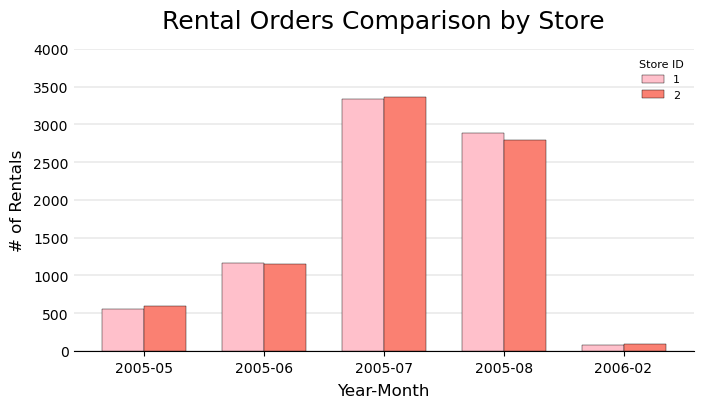

In [14]:
# setting for figure size and resolution
fig = plt.figure(figsize=figsize, dpi=100)

# properties for clusterred bar plots
bar_width = .35
tick_labels = sorted(df3.rental_year_month.unique())
x_pos = np.arange(len(tick_labels))
plt.grid(axis='y', color='grey', zorder=0, linewidth=.2)

# main function for bar plotting
# bar plot for 'store 1'
plt.bar(data=df3[df3.store_id==1], 
        x=x_pos, 
        height='count_rentals', 
        width=bar_width, 
        label='1', 
        zorder=10, 
        color='pink', 
        edgecolor='k', 
        linewidth=.3)

# bar plot for 'store 2'
plt.bar(data=df3[df3.store_id==2], 
        x=x_pos + bar_width, 
        height='count_rentals', 
        width=bar_width, 
        label='2', 
        zorder=10, 
        color='salmon', 
        edgecolor='k', 
        linewidth=.3)

# customized configurations for clusterred barplots
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_facecolor('white')
fig.set_facecolor('white')
ax.tick_params(axis='y', length=0);

plt.xticks(x_pos + bar_width/2, tick_labels)
plt.ylim(0, 4000)

plt.xlabel('Year-Month', fontsize=label_fontsize, labelpad=label_pad)
plt.ylabel('# of Rentals', fontsize=label_fontsize, labelpad=label_pad)
plt.title('Rental Orders Comparison by Store', pad=title_pad, fontsize=title_fontsize)

plt.legend(title='Store ID', 
           loc='upper right', 
           frameon=False, 
           title_fontsize=8, 
           prop={'size': 8});

# export viz to file
plt.savefig('query3_retal_orders_byStore.png', dpi=120, transparent=True)

<a id='query6'></a>
## Query 4. Payment Difference between months for Top 10 Payors

Finally, for each of these top 10 paying customers, I would like to find out the difference across their monthly payments during 2007. Please go ahead and write a query to compare the payment amounts in each successive month. Repeat this for each of these 10 paying customers. Also, it will be tremendously helpful if you can identify the customer name who paid the most difference in terms of payments.

In [19]:
df4 = pd.read_csv('query_results/query6.csv')
df4.head()

,month_trunc,customer_full_name,pay_amount,lead,difference
0,2007-04-01T00:00:00.000Z,Karl Seal,89.80,NaN,NaN
1,2007-04-01T00:00:00.000Z,Tommy Collazo,89.82,NaN,NaN
2,2007-04-01T00:00:00.000Z,Rhonda Kennedy,96.81,NaN,NaN
3,2007-05-01T00:00:00.000Z,Ana Bradley,2.99,NaN,NaN
4,2007-05-01T00:00:00.000Z,Marcia Dean,0.99,NaN,NaN


In [20]:
# 试验：利用正则表达式捕获样式并放在不同的列中
df4.month_trunc.str.extract(r'(\d{4})-(\d{2})-(\d{2})').head()

,0,1,2
0,2007,04,01
1,2007,04,01
2,2007,04,01
3,2007,05,01
4,2007,05,01


In [21]:
# 试验：利用正则表达式提取年-月-日在一列中
df4.month_trunc.str.extract(r'(\d{4}-\d{2}-\d{2})').head()

,0
0,2007-04-01
1,2007-04-01
2,2007-04-01
3,2007-05-01
4,2007-05-01


In [22]:
# 试验：利用字符串的切片方法提取年-月-日
df4.month_trunc.str.slice(0,10).head()

0    2007-04-01
1    2007-04-01
2    2007-04-01
3    2007-05-01
4    2007-05-01
Name: month_trunc, dtype: object

In [23]:
# data wrangling for visualization
df4['date'] = df4.month_trunc.str.extract(r'(\d{4}-\d{2}-\d{2})')
df4.sort_values(by=['customer_full_name', 'month_trunc'], inplace=True)
df4.head(10)

,month_trunc,customer_full_name,pay_amount,lead,difference,date
13,2007-02-01T00:00:00.000Z,Ana Bradley,19.96,71.84,51.88,2007-02-01
27,2007-03-01T00:00:00.000Z,Ana Bradley,71.84,72.88,1.04,2007-03-01
31,2007-04-01T00:00:00.000Z,Ana Bradley,72.88,2.99,-69.89,2007-04-01
3,2007-05-01T00:00:00.000Z,Ana Bradley,2.99,NaN,NaN,2007-05-01
14,2007-02-01T00:00:00.000Z,Clara Shaw,22.94,72.84,49.90,2007-02-01
21,2007-03-01T00:00:00.000Z,Clara Shaw,72.84,93.82,20.98,2007-03-01
8,2007-04-01T00:00:00.000Z,Clara Shaw,93.82,NaN,NaN,2007-04-01
11,2007-02-01T00:00:00.000Z,Curtis Irby,22.94,86.83,63.89,2007-02-01
29,2007-03-01T00:00:00.000Z,Curtis Irby,86.83,54.86,-31.97,2007-03-01
30,2007-04-01T00:00:00.000Z,Curtis Irby,54.86,2.99,-51.87,2007-04-01


In [24]:
# pre-test for drawing a compound plot for only one payer
tmp = df4[df4.customer_full_name=='Ana Bradley']
tmp

,month_trunc,customer_full_name,pay_amount,lead,difference,date
13,2007-02-01T00:00:00.000Z,Ana Bradley,19.96,71.84,51.88,2007-02-01
27,2007-03-01T00:00:00.000Z,Ana Bradley,71.84,72.88,1.04,2007-03-01
31,2007-04-01T00:00:00.000Z,Ana Bradley,72.88,2.99,-69.89,2007-04-01
3,2007-05-01T00:00:00.000Z,Ana Bradley,2.99,NaN,NaN,2007-05-01


In [25]:
# shift one month ahead. Similar to LEAD() function in sql
tmp.difference.shift(1)

13      NaN
27    51.88
31     1.04
3    -69.89
Name: difference, dtype: float64

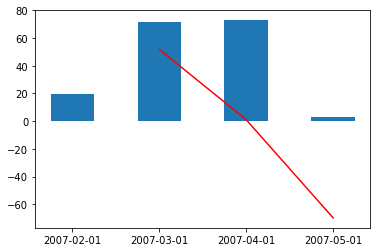

In [26]:
# plot bar and line plot in one canvas
plt.bar(data=tmp, x='date', height='pay_amount', width=.5)
plt.plot([0, 1, 2, 3], tmp.difference.shift(1), color='red');

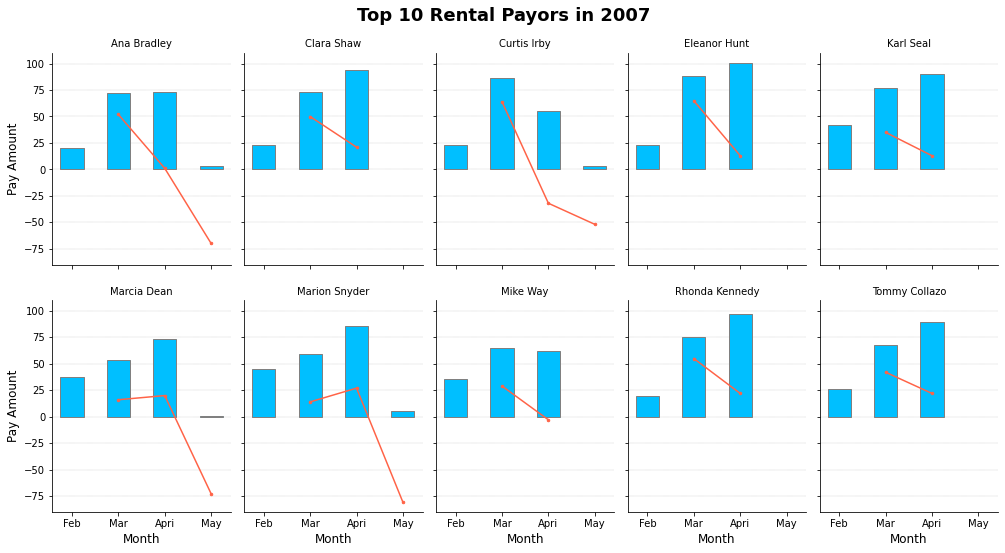

In [35]:
# wrap the pre-test codes into one function used for facetting ahead
def custom_plot(x, y1, y2, **kwargs):
    """Compound plots, consisting of bar plot and line plot.
    Barplot shows rental payment varied by month.
    Line plot shows the difference between month (differnce between current month and its previous)
    
    Params:
    -------
    x: month
    y1: rental payment
    y2: payment difference between months
    
    Returns:
    --------
    barplot and lineplot
    
    """
    plt.grid(axis='y', zorder=0, linewidth=.2, linestyle='--', color='grey')
    plt.bar(x, y1, width=.5, zorder=10, color='deepskyblue', edgecolor='grey')
    plt.plot(x, y2.shift(1), color='tomato', zorder=10, marker='.', markersize=5)
    
    plt.xticks(ticks=np.arange(4), 
               labels=['Feb', 'Mar', 'Apri', 'May'])
    
    
    plt.xlabel('Month', fontsize=label_fontsize)
    plt.ylabel('Pay Amount', fontsize=label_fontsize);
    
# main function for facetting
g = sns.FacetGrid(df4, col='customer_full_name', col_wrap=5, aspect=1,)
g.map(custom_plot, 'date', 'pay_amount', 'difference')

# adjust facetting plot size
g.fig.set_figheight(8)
g.fig.set_figwidth(14)

# Adjust subtitle display in each subplot
g.set_titles(col_template='{col_name}', size=10)

# super title location
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Top 10 Rental Payors in 2007', fontsize=title_fontsize, fontweight='bold')

# Adjust subplots y label display
axes = g.axes.flatten()
axes[0].set_ylabel("Pay Amount")
axes[5].set_ylabel("Pay Amount")

# Adjust subplots x label display
for idx in np.arange(5, 10):
    axes[idx].set_xlabel("Month");

# export viz to file
plt.savefig('query4_top10_payors.png', dpi=120, transparent=True)

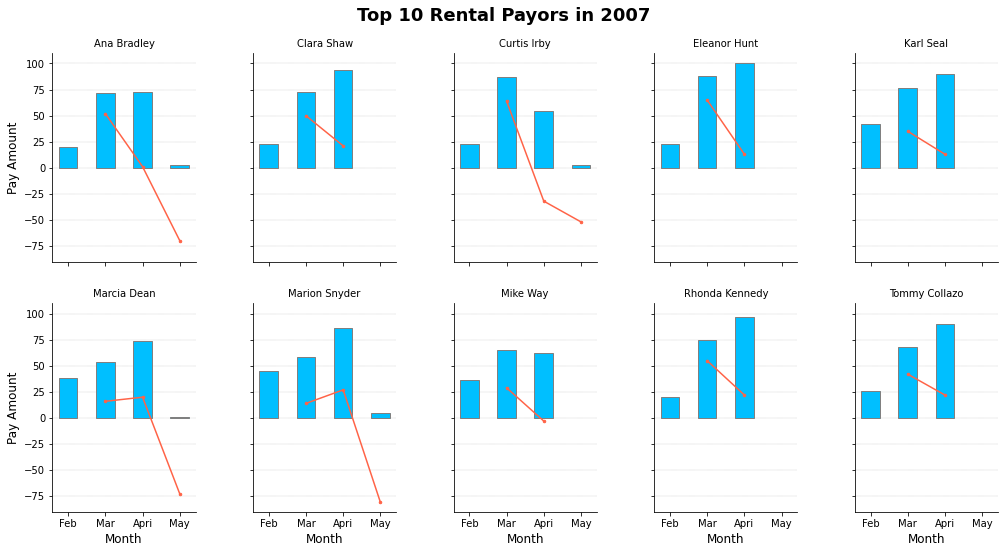

In [34]:
# Codes similar to the above except adding space between subplots horizontally and vertically
# For test only, not for report
# wrap the pre-test codes into one function used for facetting ahead
def custom_plot(x, y1, y2, **kwargs):
    """Compound plots, consisting of bar plot and line plot.
    Barplot shows rental payment varied by month.
    Line plot shows the difference between month (differnce between current month and its previous)
    
    Params:
    -------
    x: month
    y1: rental payment
    y2: payment difference between months
    
    Returns:
    --------
    barplot and lineplot
    
    """
    plt.grid(axis='y', zorder=0, linewidth=.2, linestyle='--', color='grey')
    plt.bar(x, y1, width=.5, zorder=10, color='deepskyblue', edgecolor='grey')
    plt.plot(x, y2.shift(1), color='tomato', zorder=10, marker='.', markersize=5)
    
    plt.xticks(ticks=np.arange(4), 
               labels=['Feb', 'Mar', 'Apri', 'May'])
    
    
    plt.xlabel('Month', fontsize=label_fontsize)
    plt.ylabel('Pay Amount', fontsize=label_fontsize);
    
# main function for facetting
g = sns.FacetGrid(df4, col='customer_full_name', col_wrap=5, aspect=1,)
g.map(custom_plot, 'date', 'pay_amount', 'difference')

# adjust facetting plot size
g.fig.set_figheight(8)
g.fig.set_figwidth(14)

# Adjust subtitle display in each subplot
g.set_titles(col_template='{col_name}', size=10)

# super title location
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Top 10 Rental Payors in 2007', fontsize=title_fontsize, fontweight='bold')

# add space between subplots horizontally and vertically
plt.subplots_adjust(hspace=0.2, wspace=.4)

# Adjust subplots y label display
axes = g.axes.flatten()
axes[0].set_ylabel("Pay Amount")
axes[5].set_ylabel("Pay Amount")

# Adjust subplots x label display
for idx in np.arange(5, 10):
    axes[idx].set_xlabel("Month");

# export viz to file
# plt.savefig('query4_top10_payors.png', dpi=120, transparent=True)